In [372]:
import matplotlib.pyplot as plt #1페이지
import pandas as pd
import seaborn as sns

physicla_cond=pd.read_excel("자주_이용하는_체육시설_20240116153106.xlsx",index_col=0) 
physicla_cond[1::2]
#sns.heatmap(physicla_cond)

c:\Users\test\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),통계분류(3),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2019,2019.1,...,2021.4,2021.5,2021.6,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
통계분류(1),,,,,,,,,,,,,,,,,,,,,
전체,소계,소계,21.6,29.6,1.9,10.2,11.8,24.9,24.5,21.6,...,4.3,0.6,29.1,26.8,22.7,10.8,7,4.3,1,27.4
NaN,중소도시,소계,21.9,30.3,1.9,10.7,11.2,23.9,25.5,21.8,...,3.8,0.6,28.7,24.6,23.2,12.4,7.7,4.2,1.7,26.2
성별,남성,소계,23.3,30.3,1.2,12.4,10.6,22.3,28.1,22.1,...,3.3,1,26.3,31.5,23.6,6.9,8.9,3.1,1.4,24.7
연령별,10대,소계,13,13.4,2.4,39.7,6.5,25.1,8,7.3,...,3.2,0,27.9,14.7,11.2,3.8,43.5,1.7,0,25.1
NaN,30대,소계,32.6,22.5,2.5,5.4,9,28,34.6,21.4,...,6.7,1.5,31.3,41.8,16.7,7.6,3,4.6,2.6,23.8
NaN,50대,소계,20.3,39.8,1.7,4.6,13.2,20.4,23.2,29.3,...,3.3,0.3,28.2,28,28.4,13,1.8,3.4,0.8,24.7
NaN,70세이상,소계,3.7,35,1.1,6.1,20.8,33.3,1.5,22.4,...,4.2,0.3,36.7,4.7,24.7,22.7,4,5.3,0,38.6
NaN,NaN,20대,36.3,17.3,0.9,17.6,5.3,22.5,51.3,12.1,...,2.9,0.7,20.8,43.8,21.3,1.9,9.9,3.2,1.3,18.7
NaN,NaN,40대,25.4,32.6,1,8.7,12.3,20,34.3,22.3,...,2,1.9,27,42,24,4.6,2.5,2.2,1.5,23.2


In [353]:
import matplotlib.pyplot as plt #1페이지
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 사용

physicla_data=pd.read_csv("2022년 국민생활체육조사_샘플데이터.csv") #샘플 데이터 읽어오기
physicla_table=pd.read_csv("2022년 국민생활체육조사 코드북.csv") 
new_columns=physicla_table['내용']
physicla_data.columns=new_columns #읽기 쉬운 columns 로 변경

grade=physicla_data['최종학력'] #학력 
income=physicla_data['월평균가구소득 (만원)'] #소득
own_place=physicla_data['자주 이용하는 체육시설 유형'] #체육 시설

new_df_1=pd.DataFrame([own_place,income]) #2-2


<Axes: xlabel='최종학력'>

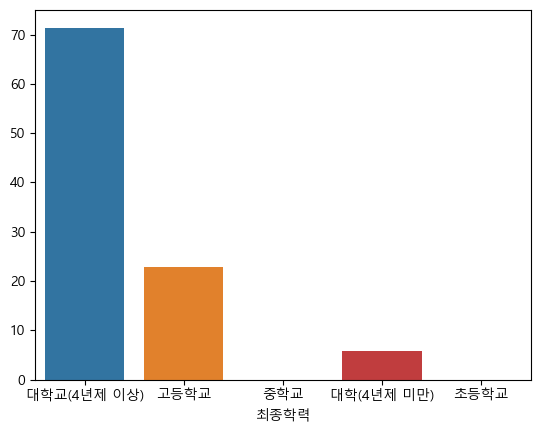

In [357]:
new_df_2=pd.DataFrame([own_place,grade]) # 2-1
grade_val=grade.value_counts() #grade 값 세기
private_user=0
by_grade=grade_val.index # x index로 들어갈 변수 - grade_val 의 index
R=list(0 for _ in by_grade) # 민간 체육 시설 이용자 수를 담아둘 변수

for j in range(5):
  for i in range(100):
    if new_df_2[i][1]==by_grade[j] and new_df_2[i][0]=='민간체육시설': # index 가 같고 민간체육시설을 이용할 때
      R[j]+=1 #count
      private_user=private_user+1

y_result=list(0 for  _ in range(5)) #y결과 도출 (해당 학력 구간 민간체육시설 이용자/민간체육시설 총 이용자)
for u in range(5):
  y_result[u]=(R[u]/private_user) *100
sns.barplot(x=by_grade,y=y_result)

([<matplotlib.patches.Wedge at 0x26199ab4f90>,
 [Text(0.5447886197087486, 1.0692078188246832, '민간체육시설'),
  Text(-1.0978293989430645, 0.06906960848527927, '공공체육시설'),
  Text(-0.20611945413751406, -1.080515974257694, '기타'),
  Text(0.6741977818040064, -0.8691704959388334, '기타체육시설'),
  Text(1.0095301050222132, -0.43686264094545685, '학교체육시설'),
  Text(1.0913261766736644, -0.13786651553891585, '자가시설'),
  Text(1.0994572176396824, -0.034551795611921995, '직장체육시설')],
 [Text(0.31779336149676995, 0.6237045609810652, '35.0%'),
  Text(-0.598816035787126, 0.03767433190106142, '28.0%'),
  Text(-0.11242879316591675, -0.5893723495951056, '18.0%'),
  Text(0.36774424462036703, -0.47409299778481817, '9.0%'),
  Text(0.5506527845575708, -0.23828871324297643, '7.0%'),
  Text(0.5952688236401805, -0.07519991756668137, '2.0%'),
  Text(0.5997039368943722, -0.01884643397013927, '1.0%')])

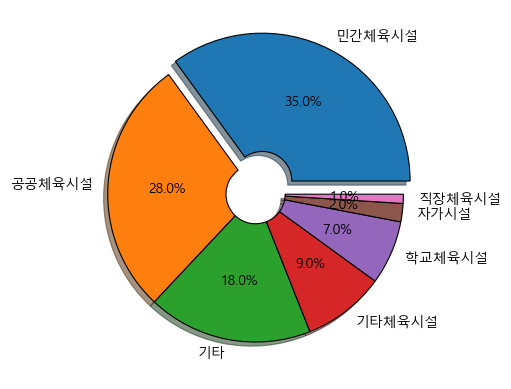

In [190]:
own_value=own_place.value_counts() #이용 체육시설 값 읽기
wedgeprops={'width':0.8,'edgecolor':'k','linewidth':0.8} #pie 만들기 조건
plt.pie(own_value,labels=own_value.index,explode=[0.1,0,0,0,0,0,0],autopct='%.1f%%',wedgeprops=wedgeprops,shadow=True) #이용 체육시설 중에 민간 체육시설의 퍼센트 확인

In [322]:
new_df_1=pd.DataFrame([own_place,income])
income_val=income.value_counts()
by_income=list(0 for _ in range(5)) #전체 갯수
for i in range(42):
  if  income_val.index[i]<=200:
    by_income[0]+=income_val.values[i]
  elif income_val.index[i] <=300:
    by_income[1]+=income_val.values[i]
  elif income_val.index[i] <=400:
    by_income[2]+=income_val.values[i]
  elif income_val.index[i] <=500:
    by_income[3]+=income_val.values[i]
  else:
    by_income[4]+=income_val.values[i]
print(by_income)






[2, 8, 9, 19, 62]


<Axes: >

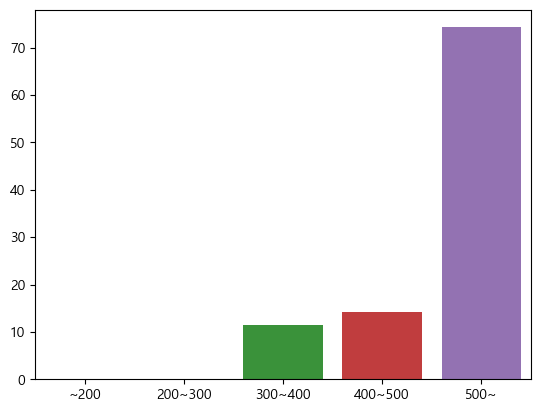

In [359]:
x_by_income=['~200','200~300','300~400','400~500','500~'] # x index
T=list(0 for _ in by_income)

for i in range(100):
  if  new_df_1[i][1]<=200 and new_df_1[i][0]=='민간체육시설': # 해당 금액 범위 내 민간 체육시설 이용객 카운팅
    T[0]+=1
  elif new_df_1[i][1]<=300 and new_df_1[i][0]=='민간체육시설':
    T[1]+=1
  elif new_df_1[i][1]<=400 and new_df_1[i][0]=='민간체육시설':
    T[2]+=1
  elif new_df_1[i][1]<=500 and new_df_1[i][0]=='민간체육시설':
    T[3]+=1
  elif new_df_1[i][0]=='민간체육시설':
    T[4]+=1

y_result=list(0 for  _ in range(5))
for u in range(5):
  y_result[u]=(T[u]/private_user) *100  
sns.barplot(x=x_by_income,y=y_result)